In [21]:
import numpy
import sympy
from sympy import init_printing
init_printing()

from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

x, x0, sigma0, p0, h, = sympy.symbols('x x0 sigma0 p0 h', real = True )

# Divido la costruzione della funzione in parti
esponente0   = -((x-x0)**2 / (4 * sigma0**2))
frazione     = sympy.exp(esponente0) / sympy.sqrt(2 * sympy.pi * sigma0)
esponente1   = (p0 * 1j * (x-x0)/ h)
esponenziale = sympy.exp(esponente1)
#funzione finale
psi = 3.5e-17 * frazione * esponenziale
#print(psi)
#psi

#dichiariamo le variabili pt_1

x0_value     = 10**-1          #posizione iniziale (metri) +
M            = 10**-30         #massa dell'elettrone
vg           = 10**-1          #velocità di gruppo (m/s)
p0_value     = vg * M          #quantità di moto (kg * m/s) +
h_value      = 1.054 * 10**-34 #costante di Planck (J * s) +
sigma0_value = 2 * 10**-2      #dispersione iniziale (m) + 
x_value      = 1               #spazio totale percorso (x= 0 to x=1 m) +

#--------------------------------------------------------------------------funzione d'onda
from sympy.utilities.lambdify import lambdify

#--------------------------------------------------------------------------barriera potenziale
K = (p0_value**2) / (2 * M) #energia cinetica delle particelle
v0 = numpy.array([0 * K, -2 * K, -1 * K, -1/2 * K, 1 * K, 1/2 * K, 2 * K])


In [22]:
import sys
import time as clock

class ProgressBar:
    
    def __init__(self, total_iterations):
        
        self.total_iterations = total_iterations
        self.current_iteration = 0
        self.start_time = clock.time()
        
    def step(self):
        
        self.current_iteration += 1
        self.show_progress()
        if self.current_iteration == self.total_iterations:
            self.end_time = clock.time()
            print(f'\Total time taken: {self.end_time -self.start_time} seconds')
    
    def show_progress(self):
        
        percent_complete = self.current_iteration / self.total_iterations
        num_bars = int(percent_complete * 20)
        sys.stdout.write('\r')
        sys.stdout.write(f"Progress: [{'=' * num_bars}{' ' * (20 - num_bars)}]{int(percent_complete * 100)}%")
        sys.stdout.flush()
    
        

In [23]:
#calcoliamo separatamente parte reale e parte immaginaria
#utilizzando la discretizzazione dell'equazione di Schrodinger
def evolve_step(nt, nx, dt, dx, potenziale_0):
    
    #inizializzazione griglia
    x_grid = numpy.linspace(0, x_value, nx)
    
    #condizioni iniziali funzione al tempo (t = 0)
    psi_lamb = lambdify((x0, x, p0, sigma0, h), psi)
    p = numpy.asarray([psi_lamb(x0_value, x, p0_value, sigma0_value, h_value) for x in x_grid])
    
    #barriera potenziale
    v = numpy.ones(nx) 
    v[numpy.intersect1d(numpy.where(x_grid >= 5.0 * 10**-1), numpy.where(x_grid <= 5.5 * 10**-1))] = potenziale_0
    
    #lower and upper
    v[numpy.where( x_grid < 5.0 * 10**-1 )] = 0
    v[numpy.where( x_grid > 5.5 * 10**-1 )] = 0
    
    #initialize vector
    un     = numpy.empty(nx)
    en     = numpy.empty(nx)
    
    real_psi = numpy.real(p)
    imag_psi = numpy.imag(p)
    
    #stepping
    pb = ProgressBar(nt)
    for n in range(nt):
            
        #parte immaginaria
        en = imag_psi.copy()
        real_psi[1:-1] +=  - (h_value/(2 * M))*dt/dx**2*(en[2:] - 2*en[1:-1] + en[0:-2]) \
                               + (dt/h_value) * v[1:-1] * en[1:-1]
        #At the boundary
        real_psi[0]    = 0
        real_psi[-1]   = 0
    
        #parte reale
        un = real_psi.copy()   
        imag_psi[1:-1] +=   (h_value/(2 * M))*dt/dx**2*(un[2:] - 2*un[1:-1] + un[0:-2]) \
                           - (dt / h_value) * v[1:-1] * un[1:-1]
        #At the boundary    
        imag_psi[0]    = 0
        imag_psi[-1]   = 0
        
        pb.step()
    #uniamo parte reale e parte immaginaria
    p = real_psi + 1j * imag_psi
    pyplot.plot(x_grid, abs(p)**2, color='#003366', ls='-', lw=3)

In [24]:
def set_time(time):
    T      = time                  #tempo di evoluzione della waveform (s)
    dx     = 10**-4                #passo spaziale (m)
    dt     = 0.00009               #passo temporale
    nt     = int(T / dt)           #numero totale di passi temporali ---> prova 50000!!!800000 
    nx     = int(x_value / dx) + 1 #numero di punti della griglia
    return numpy.array([nt, nx])

Progress: [====================]100%\Total time taken: 280.5503497123718 seconds


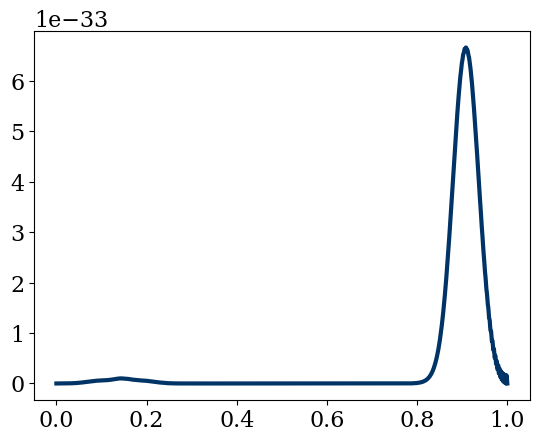

In [64]:
val = set_time(8)
evolve_step(val[0],val[1], 0.00009, 10**-4, v0[3])

Progress: [====================]100%\Total time taken: 197.72444224357605 seconds


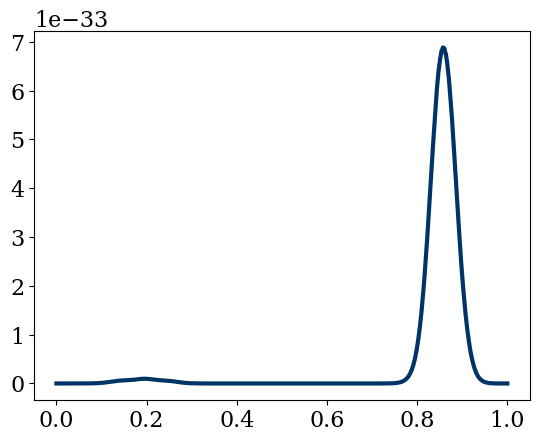

In [61]:
val = set_time(7.5)
evolve_step(val[0],val[1], 0.00009, 10**-4, v0[3])

Progress: [====================]100%\Total time taken: 173.0868546962738 seconds


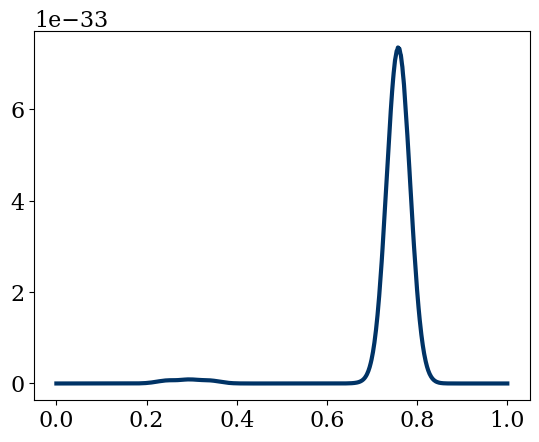

In [60]:
val = set_time(6.5)
evolve_step(val[0],val[1], 0.00009, 10**-4, v0[3])

Progress: [====================]100%\Total time taken: 134.3303120136261 seconds


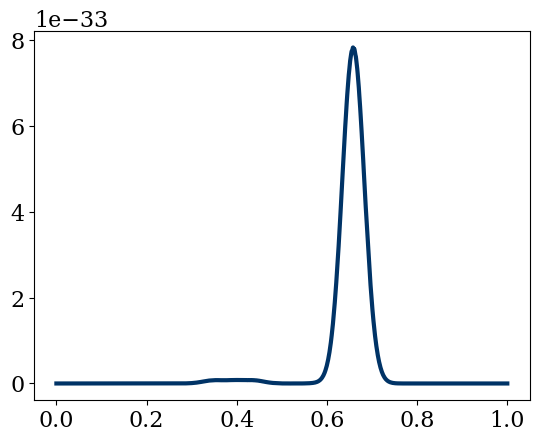

In [59]:
val = set_time(5.5)
evolve_step(val[0],val[1], 0.00009, 10**-4, v0[3])

Progress: [====================]100%\Total time taken: 118.66733813285828 seconds


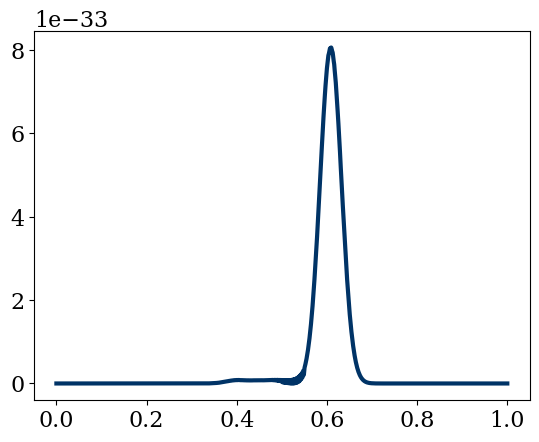

In [58]:
val = set_time(5)
evolve_step(val[0],val[1], 0.00009, 10**-4, v0[3])

Progress: [====================]100%\Total time taken: 122.99293160438538 seconds


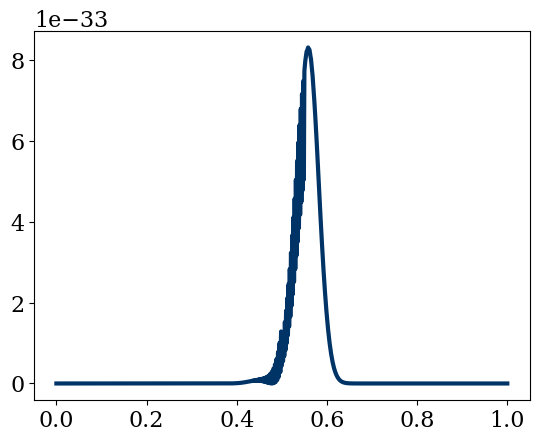

In [51]:
val = set_time(4.5)
evolve_step(val[0],val[1], 0.00009, 10**-4, v0[3])

Progress: [====================]100%\Total time taken: 92.92797422409058 seconds


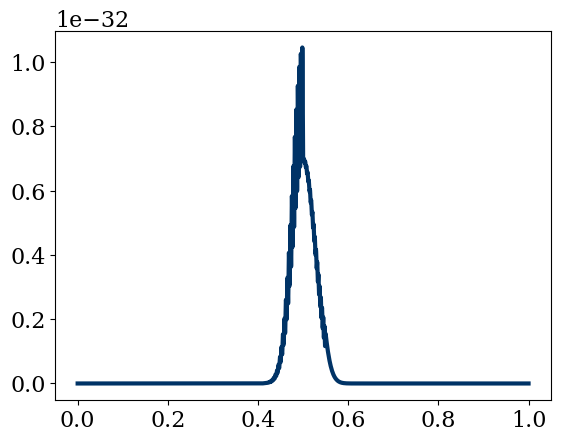

In [49]:
val = set_time(4)
evolve_step(val[0],val[1], 0.00009, 10**-4, v0[3])

Progress: [====================]100%\Total time taken: 90.1309916973114 seconds


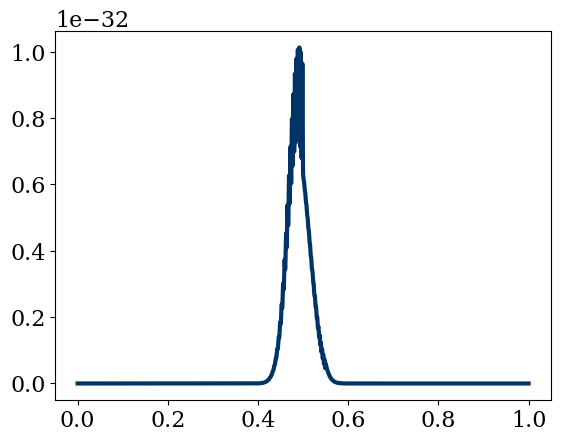

In [52]:
val = set_time(3.9)
evolve_step(val[0],val[1], 0.00009, 10**-4, v0[3])

Progress: [====================]100%\Total time taken: 85.11952042579651 seconds


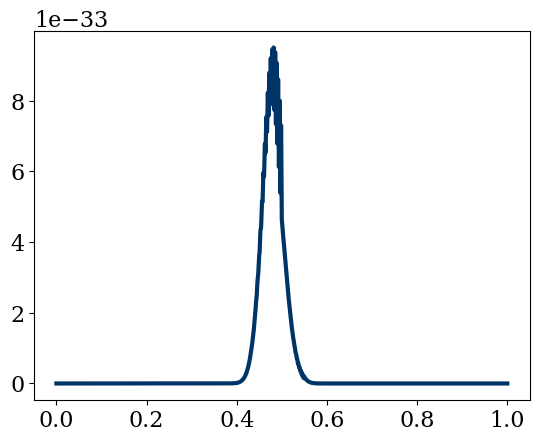

In [50]:
val = set_time(3.8)
evolve_step(val[0],val[1], 0.00009, 10**-4, v0[3])

Progress: [====================]100%\Total time taken: 83.00529050827026 seconds


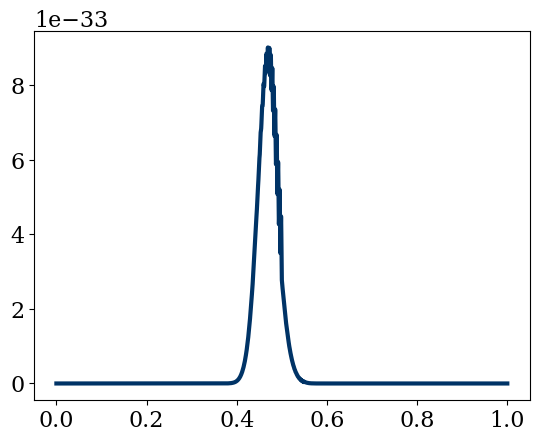

In [53]:
val = set_time(3.7)
evolve_step(val[0],val[1], 0.00009, 10**-4, v0[3])

Progress: [====================]100%\Total time taken: 83.54020047187805 seconds


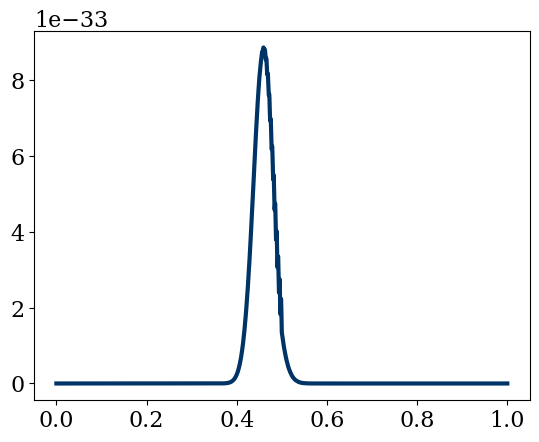

In [57]:
val = set_time(3.6)
evolve_step(val[0],val[1], 0.00009, 10**-4, v0[3])

Progress: [====================]100%\Total time taken: 83.53658151626587 seconds


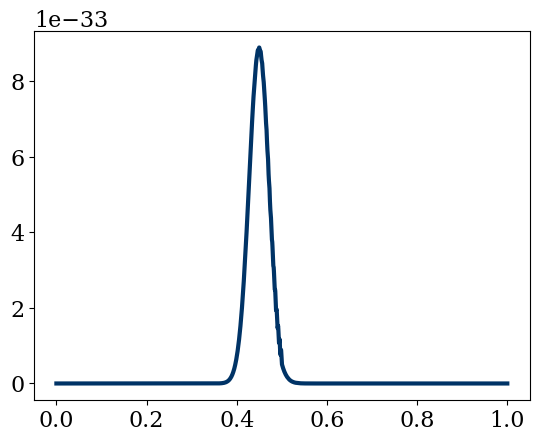

In [56]:
val = set_time(3.5)
evolve_step(val[0],val[1], 0.00009, 10**-4, v0[3])

Progress: [====================]100%\Total time taken: 69.89924478530884 seconds


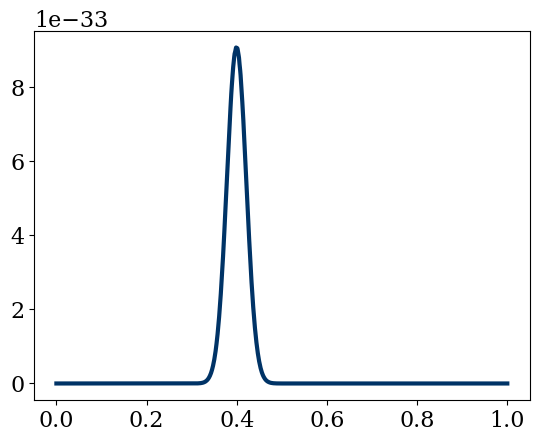

In [55]:
val = set_time(3)
evolve_step(val[0],val[1], 0.00009, 10**-4, v0[3])

Progress: [====================]100%\Total time taken: 61.413941860198975 seconds


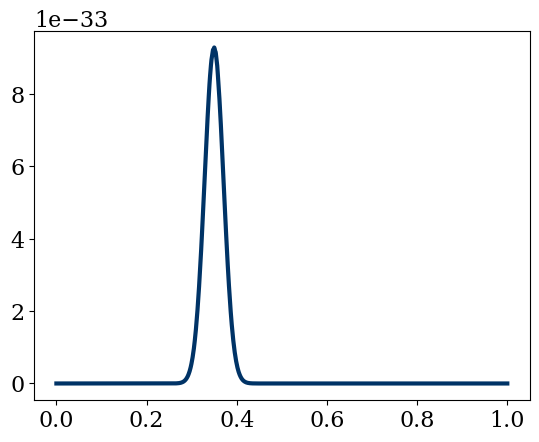

In [54]:
val = set_time(2.5)
evolve_step(val[0],val[1], 0.00009, 10**-4, v0[3])